In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Plotting the Confusion Matrix
import matplotlib.pyplot as plt
import matplotlib as pl
import seaborn as sns
import itertools
import matplotlib

matplotlib.rc('figure', figsize=(11, 11))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Best Criterion: entropy
Best max_depth: 12
Best Number Of Components: 11

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Matriz de confusão:
Confusion matrix, without normalization


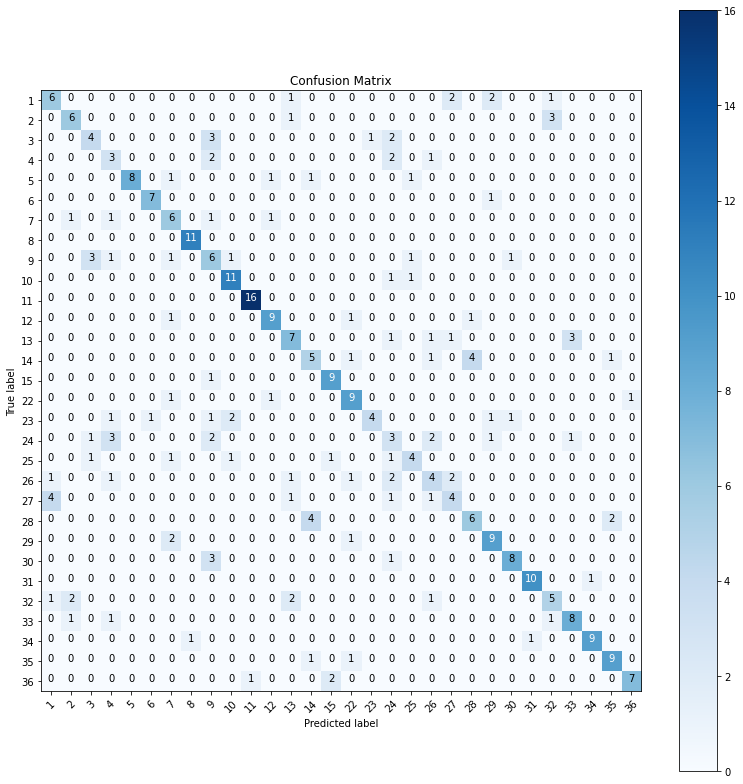

In [8]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Carregando a base de dados Leaf
import pandas as pd
df = pd.read_csv (r'leaf.csv', delimiter=',', header=None)
dataset = df.to_numpy()
X = dataset[:,2:16]
y = dataset[:,0]


std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion,dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Resultados baseados em Validacao Cruzada
Qtde folds: 5:
Taxa de Acerto: 0.62
Desvio padrao: 0.05
Matriz de confusão:
Confusion matrix, without normalization


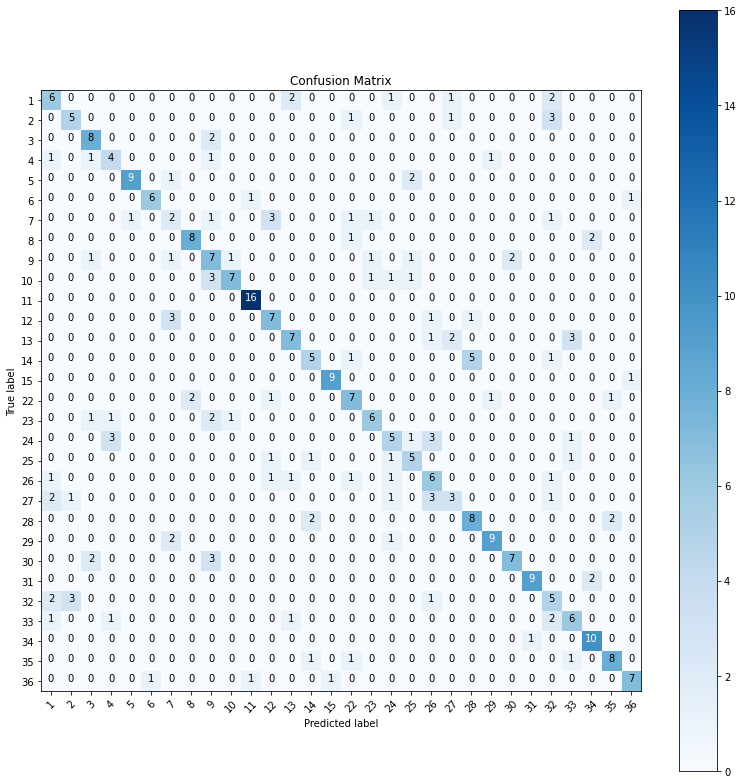

In [10]:
# Este exemplo carrega a base Wine da UCI, treina uma Arvore de decisao usando 
# holdout e outra usando validacao cruzada com 10 pastas. 

# Importa bibliotecas necessarias 
import numpy as np
import urllib.request
from sklearn import tree
from sklearn.svm import SVC
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
from sklearn.metrics import f1_score
import pydotplus
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


# Carregando a base de dados Leaf
import pandas as pd
df = pd.read_csv (r'leaf.csv', delimiter=',', header=None)
dataset = df.to_numpy()
X = dataset[:,2:16]
y = dataset[:,0]

#   TREE

# EXEMPLO USANDO VALIDACAO CRUZADA
clfb = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')



#Definição dos parâmetros a serem avaliados no ajuste fino do SVM
parameters = [
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['linear']},
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
 ]

folds=5
result = model_selection.cross_val_score(clfb, X, y, cv=folds)

print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())

# matriz de confusão da validacao cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusão:")
cm_plot_labels = ['1','2','3','4','5','6','7','8','9', '10', '11', '12', '13', '14', '15', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
plot_confusion_matrix(cm,cm_plot_labels,title ='Confusion Matrix')

# KNN


Resultados baseados em Validacao Cruzada
Qtde folds: 5:
Taxa de Acerto: 0.59
Desvio padrao: 0.04
Matriz de confusão:
Confusion matrix, without normalization
{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


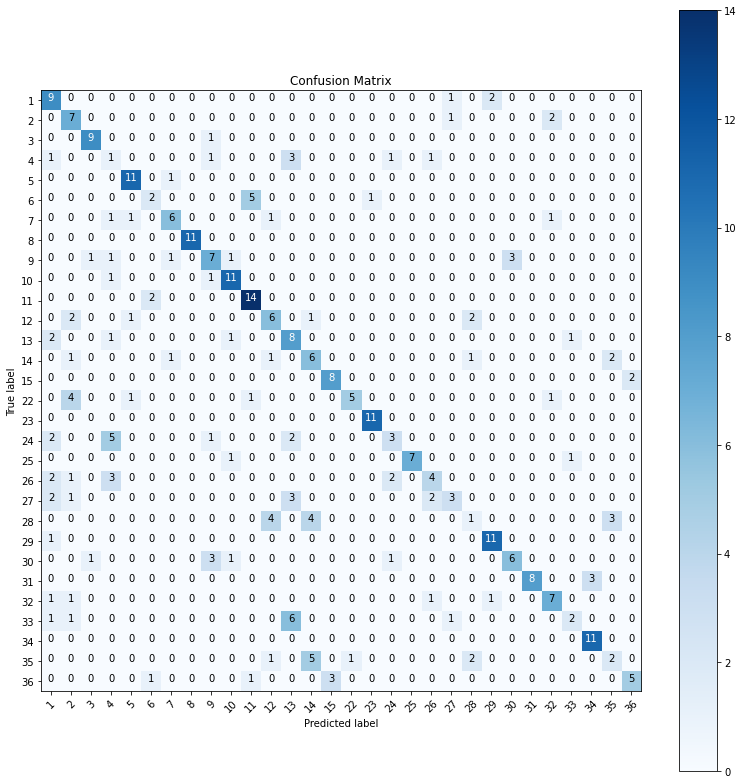

In [17]:
import numpy as np
import urllib.request
from sklearn import tree
from sklearn.svm import SVC
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
from sklearn.metrics import f1_score
import pydotplus
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# KNN
# Carregando a base de dados Leaf
import pandas as pd
df = pd.read_csv (r'leaf.csv', delimiter=',', header=None)
dataset = df.to_numpy()
X = dataset[:,2:16]
y = dataset[:,0]

# clfb = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', p=p, algorithm='auto')


clfb = KNeighborsClassifier()

parameters = {'n_neighbors':[3,4,5,6,7,8,9],
              'leaf_size':[1,3,5,7,9],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
model = GridSearchCV(clfb, param_grid=parameters)
model.fit(X,y)

#predictions on test data
prediction=model.predict(X)

folds=5
result = model_selection.cross_val_score(model, X, y, cv=folds)

print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())

Z = model_selection.cross_val_predict(model, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusão:")
cm_plot_labels = ['1','2','3','4','5','6','7','8','9', '10', '11', '12', '13', '14', '15', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
plot_confusion_matrix(cm,cm_plot_labels,title ='Confusion Matrix')

print(model.best_estimator_.get_params())

# new balance


Resultados baseados em Validacao Cruzada
Qtde folds: 5:
Taxa de Acerto: 0.73
Desvio padrao: 0.05
Matriz de confusão:
Confusion matrix, without normalization


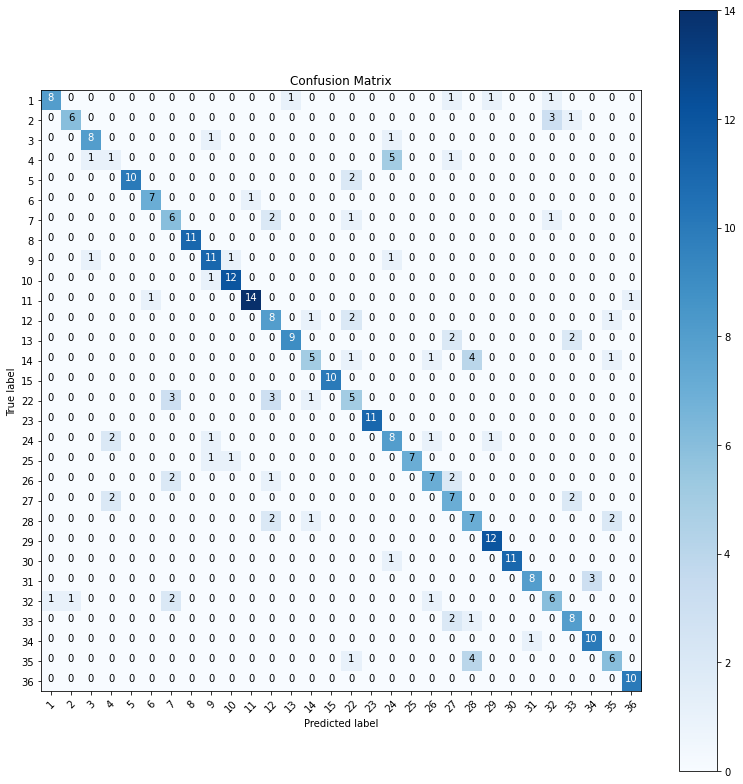

In [21]:
# Este exemplo carrega a base Wine da UCI, treina uma Arvore de decisao usando 
# holdout e outra usando validacao cruzada com 10 pastas. 

# Importa bibliotecas necessarias 
import numpy as np
import urllib.request
from sklearn import tree
from sklearn.svm import SVC
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
from sklearn.metrics import f1_score
import pydotplus
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Carregando a base de dados Leaf
import pandas as pd
df = pd.read_csv (r'leaf.csv', delimiter=',', header=None)
dataset = df.to_numpy()
X = dataset[:,2:16]
y = dataset[:,0]

# clfb = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', p=p, algorithm='auto')


model = GaussianNB()


folds=5
result = model_selection.cross_val_score(model, X, y, cv=folds)

print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())

# matriz de confusão da validacao cruzada
Z = model_selection.cross_val_predict(model, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusão:")
cm_plot_labels = ['1','2','3','4','5','6','7','8','9', '10', '11', '12', '13', '14', '15', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
plot_confusion_matrix(cm,cm_plot_labels,title ='Confusion Matrix')


# SVM

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 500, 'kernel': 'linear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed 


Resultados baseados em Validacao Cruzada
Qtde folds: 5:
Taxa de Acerto: 0.76
Desvio padrao: 0.03


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed 

Matriz de confusão:
Confusion matrix, without normalization


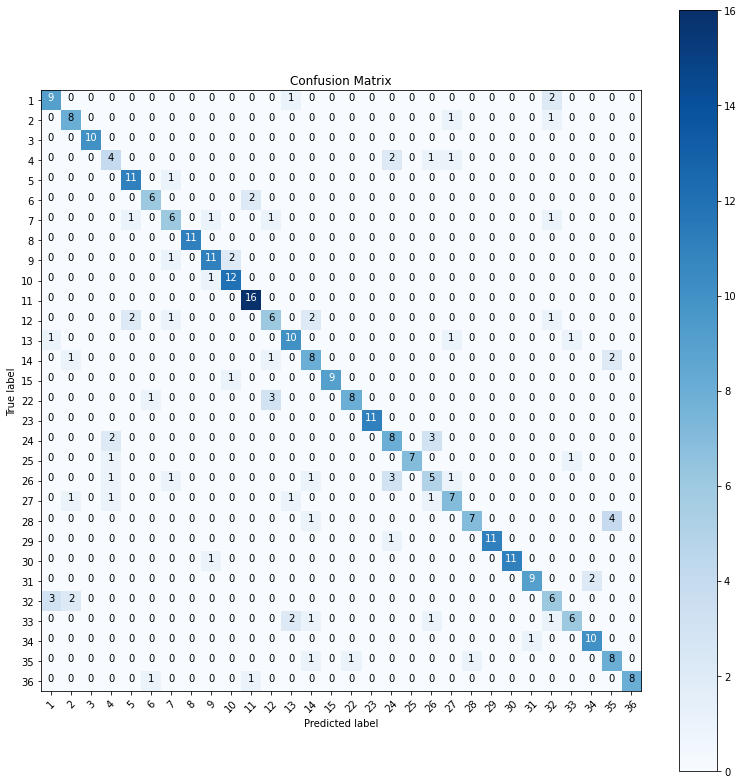

In [24]:
# Este exemplo carrega a base Wine da UCI, treina uma Arvore de decisao usando 
# holdout e outra usando validacao cruzada com 10 pastas. 

# Importa bibliotecas necessarias 
import numpy as np
import urllib.request
from sklearn import tree
from sklearn.svm import SVC
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
from sklearn.metrics import f1_score
import pydotplus
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Carregando a base de dados Leaf
import pandas as pd
df = pd.read_csv (r'leaf.csv', delimiter=',', header=None)
dataset = df.to_numpy()
X = dataset[:,2:16]
y = dataset[:,0]

# clfb = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', p=p, algorithm='auto')


parameters =[
    {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'kernel': ['linear']},
  {'C': [0.1, 0.5, 1, 10, 100, 500, 1000], 'gamma': [0.1, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']},
 ]
 

model = SVC(probability=True)
model = GridSearchCV(model, parameters, scoring = 'accuracy', cv=10, iid=False)
model = model.fit(X, y)
print(model.best_params_)


folds=5
result = model_selection.cross_val_score(model, X, y, cv=folds)

print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())

# matriz de confusão da validacao cruzada
Z = model_selection.cross_val_predict(model, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusão:")
cm_plot_labels = ['1','2','3','4','5','6','7','8','9', '10', '11', '12', '13', '14', '15', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']
plot_confusion_matrix(cm,cm_plot_labels,title ='Confusion Matrix')
